In [2]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np



Bad key "legend.title_fontsize" on line 22 in
C:\Users\Sierkinhane\.matplotlib\stylelib\notebook.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# 灰度变化和空间滤波

## 背景知识
### 灰度变换和空间滤波基础

空间域处理：
$$g(x,y)=T[f(x,y)]$$
其中$f(x,y)$是输入图像，$g(x,y)$是处理后的图像，$T$是在点$(x,y)$的邻域上定义的关于$f$的一种算子。

<div align='center'>
<img src="../images/dip/3.1.png" width=300 height=300 alt='3.1' align=center />
图3.1</div>

空间域一幅图像中关于点$(x,y)$的一个$3x3$邻域。邻域在图像中从一个像素到另一个像素移动来生成一幅输出图像。当该邻域的原点位于图像的边界上时，部分将位于图像的外部，此时可忽略$T$对外侧邻点的计算，或者用0或其他指定的灰度值填充图像的边缘。这个过程称为空间滤波，其中，邻域与预定义的操作一起称为**空间滤波器**（也称为**空间掩膜、核、模板或窗口**）。

最小邻域的大小为$1x1$，$T$成为灰度（也称灰度级或映射）变换函数：
$$s=T(r)$$
$r$和$s$分别表示变量，即$g$和$f$在任意点$(x,y)$处的灰度。

## 一些基本的灰度变换函数
### 图像反转
$$s=L-1-r$$

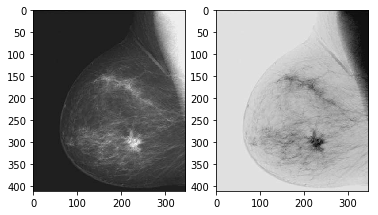

In [6]:
mammogram = cv2.imread('../images/dip/3.4.jpg')
neg_mammogram = 256 - 1 - mammogram
fig, ax = plt.subplots(1,2)
ax[0].imshow(mammogram)
ax[1].imshow(neg_mammogram)

### 对数变换
<div align='center'>
    <img src="../images/dip/3.3.png" width=300 height=300 align=center/>
图3.4</div>


$$s=clog(1+r)$$
其中$c$是一个常数，并假设$r\geq0$。对数变换用于扩展图像中的暗像素的值，同时压缩更高灰度级的值。反对数变换的作用与此相反。对数函数有个重要特征，即它压缩像素值变化较大的图像的动态范围。像素值有较大的动态范围的一个典型应用说明是傅里叶频谱，通常达到0到$10^6$，甚至更高。尽管计算机能毫无问题地处理这一范围的数字，但图像的现实系统通常不能如实地再现如此大范围的灰度值。

original range [0, 172756384.0], current range [0, 18.96739298085521]


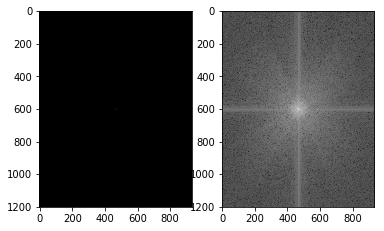

In [2]:
hualun = cv2.imread('../images/dip/hualun.png', 0) 
fourier_spectrum = np.fft.fft2(hualun)
fourier_spectrum = np.fft.fftshift(fourier_spectrum) # 将频谱平移到图像中心
fs_abs = np.abs(fourier_spectrum)

c = 1
s = c*np.log(1+fs_abs)
print('original range [0, {}], current range [0, {}]'.format(fs_abs.max(), s.max()))

def scale(x,  c, d, a, b):
    # [a,b]: 变换到的区间
    # [c,d]: 原区间
    return (b-a)/(d-c)*(x-c) + a

fs_abs  = scale(fs_abs, 0, fs_abs.max(), 0, 255)
s  = scale(s, 0, s.max(), 0, 255)

fig, ax = plt.subplots(1,2)
ax[0].imshow(fs_abs, cmap = 'gray')
ax[1].imshow(s, cmap = 'gray')

### 幂律(伽马)变换
幂律变换的基本形式为
$$s=cr^{\gamma}\quad or\quad s=c(r+\epsilon)^{\gamma}$$
其中$c$和$\gamma$为正常数。

<div align='center'>
    <img src='../images/dip/3.6.png' width=300 height=300 align=center/>
图3.6 （所有情况c=1）</div>

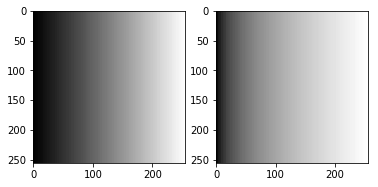

In [45]:
img = cv2.imread('../images/dip/3.7.jpg', 0)
c = 1
s =  c*img**(1/2.5)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(s, cmap='gray')

Text(0.5,1,'gamma=0.3')

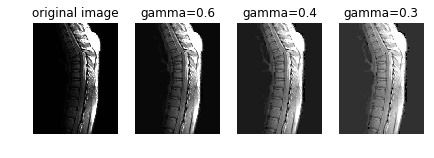

In [19]:
img = cv2.imread('../images/dip/3.8.jpg', 0)
c = 1
gamma = [0.6, 0.4, 0.3]
s = []
for g in gamma:
    s.append(c*img**g)

fig, ax = plt.subplots(1,4, figsize=(7,7))
for i in range(len(ax)):
    ax[i].axis('off')
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(s[0], cmap='gray')
ax[1].set_title('gamma=0.6')
ax[2].imshow(s[1], cmap='gray')
ax[2].set_title('gamma=0.4')
ax[3].imshow(s[2], cmap='gray')
ax[3].set_title('gamma=0.3')


以上都是幂律变换在扩展灰度级上的应用。要处理的图像有“冲淡”的外观，表明灰度级的压缩是必须的。

Text(0.5,1,'gamma=5')

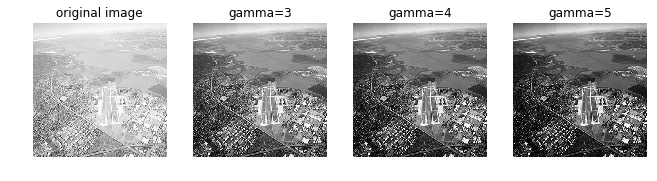

In [41]:
img = cv2.imread('../images/dip/3.9.jpg', 0)
c = 1
gamma = [3.0, 4.0, 5.0]
s = []
for g in gamma:
    s.append(c*img**g)

fig, ax = plt.subplots(1,4, figsize=(11,11))
for i in range(len(ax)):
    ax[i].axis('off')
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(s[0], cmap='gray')
ax[1].set_title('gamma=3')
ax[2].imshow(s[1], cmap='gray')
ax[2].set_title('gamma=4')
ax[3].imshow(s[2], cmap='gray')
ax[3].set_title('gamma=5')

### 分段线性变换函数
#### 对比度拉伸
低对比度图像可由照明不足、成像传感器动态范围太小，甚至图像获取过程中镜头光圈设置错误引起。对比度拉伸是扩展图像灰度级动态范围处理。

<div align='center'>
    <img src='../images/dip/3.10-1.png' width=300 height=300 align=center/>
图3.10</div>

两点式$$\frac{x-x_1}{x_2-x_1}=\frac{y-y_1}{y_2-y_1}$$

F:\Anaconda\anaconda3-5.2.0\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0.5,1,'binary image')

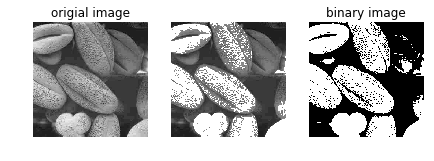

In [121]:
img = cv2.imread('../images/dip/3.10-2.jpg', 0)

def func(img, r1=96, s1=32, r2=160, s2=180, L=256):
    
    idx = np.where(img < r1)
    img[idx] = (s1 / r1 * img)[idx]
    idx = np.where((img <  r2) & (img >= r1))
    img[idx] = ((img - r1) / (r2 - r1) * (s2 - s1) + s1)[idx]
    idx = np.where((img < (L-1)) & (img >= r2))
    img[idx] = ((img - r2) / (L-1 - r2) * (L-1 - s2) + s2)[idx]
    
    return img

img_ = func(img.astype(np.float32), r1=img.min(), s1=0, r2=img.max(), s2=256-1, L=256)
img_ = np.clip(img_, 0, 255)#.astype(np.uint8)
img_th = func(img.astype(np.float32), r1=img.mean(), s1=0, r2=img.mean(), s2=256-1, L=256)
img_th = np.clip(img_th, 0, 255)#.astype(np.uint8)

fig, ax = plt.subplots(1,3, figsize=(7,7))
for i in range(len(ax)):
    ax[i].axis('off')
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_, cmap='gray')
ax[2].imshow(img_th, cmap='gray')
ax[0].set_title('origial image')
ax[2].set_title('binary image')

#### 灰度级分层
突出图像中特定灰度范围的亮度通常是重要的，其应用包括增强特征，如卫星图像中大量的水和X射线图像中的缺陷。
<div align='center'>
    <img src='../images/dip/3.11.png' width=300 height=300 align=center/>
图3.11</div>


240 103.57199375663899


Text(0.5,1,'')

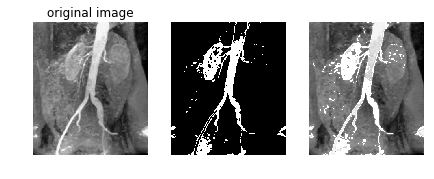

In [153]:
img = cv2.imread('../images/dip/3.12.jpg', 0)

def func_a(img, A=20, B=210, Value=220, L=256):
    
    idx = np.where(img < A)
    img[idx] = 0
    idx = np.where((img <  B) & (img >= A))
    img[idx] = Value
    idx = np.where((img < (L-1)) & (img >= B))
    img[idx] = 0
    
    return img

def func_b(img, A=20, B=210, Value=220, L=256):
    
    idx = np.where((img <  B) & (img >= A))
    img[idx] = Value

    return img

img_a = func_a(img.astype(np.float32), A=145, B=220, Value=180)
img_b = func_b(img.astype(np.float32), A=140, B=190, Value=240)

fig, ax = plt.subplots(1,3, figsize=(7,7))
for i in range(len(ax)):
    ax[i].axis('off')
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(img_a, cmap='gray')
ax[1].set_title('')
ax[2].imshow(img_b, cmap='gray')
ax[2].set_title('')

#### 比特平面分层
像素是由比特组成的数字。例如，在256级灰度图像中，每个像素的灰度有8比特组成。代替突出灰度级范围，我们可突出特定比特来为整个图像外观做出贡献。
<div align='center'>
    <img src='../images/dip/3.13.png' width=300 height=300 align=center/>
图3.12</div>

如上图，一幅8比特图像可考虑为由8个1比特平面组成，其中平面1包含图像中所有像素的最低阶比特，而平面8包含图像中所有像素的最高阶比特。高阶比特包含了在视觉上很重要的大多数数据，低阶比特平面在图像中贡献了更精细的灰度细节。

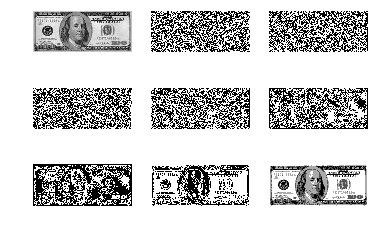

In [233]:
img = cv2.imread('../images/dip/3.14.jpg', 0)

def bit_map(img):
    
    h, w = img.shape[0], img.shape[1]
    _8bit_image = np.zeros((h, w, 8))

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            _8bit_value = str(np.binary_repr(img[i, j], width=8))[::-1]
            
            for k in range(8):
                _8bit_image[i, j, k] = _8bit_value[k]
    
    return _8bit_image

_8bit_image = bit_map(img)

fig, ax = plt.subplots(3,3)
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i, j].axis('off')
ax[0,0].imshow(img, cmap='gray')
ax[0,1].imshow(_8bit_image[:,:,0], cmap='gray')
ax[0,2].imshow(_8bit_image[:,:,1], cmap='gray')
ax[1,0].imshow(_8bit_image[:,:,2], cmap='gray')
ax[1,1].imshow(_8bit_image[:,:,3], cmap='gray')
ax[1,2].imshow(_8bit_image[:,:,4], cmap='gray')
ax[2,0].imshow(_8bit_image[:,:,5], cmap='gray')
ax[2,1].imshow(_8bit_image[:,:,6], cmap='gray')
ax[2,2].imshow(_8bit_image[:,:,7], cmap='gray')

Text(0.5,1,'recon with 8 7 6 5')

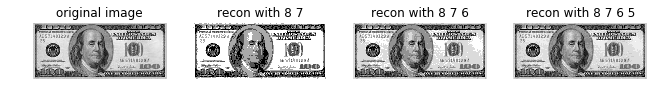

In [246]:
# 重建图像
reconstruction_8_7 = _8bit_image[:,:,6] * 64 + _8bit_image[:,:,7] * 128
reconstruction_8_7_6 = _8bit_image[:,:,5] * 32 + _8bit_image[:,:,6] * 64 + _8bit_image[:,:,7] * 128
reconstruction_8_7_6_5 =  _8bit_image[:,:,4] * 16 + _8bit_image[:,:,5] * 32 + _8bit_image[:,:,6] * 64 + _8bit_image[:,:,7] * 128
fig, ax = plt.subplots(1,4, figsize=(11,11))
for i in range(len(ax)):
    ax[i].axis('off')
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(reconstruction_8_7, cmap='gray')
ax[1].set_title('recon with 8 7')
ax[2].imshow(reconstruction_8_7_6, cmap='gray')
ax[2].set_title('recon with 8 7 6')
ax[3].imshow(reconstruction_8_7_6_5, cmap='gray')
ax[3].set_title('recon with 8 7 6 5')

**存储4个高阶比特平面将允许我们以可接受的细节来重建原图像，存储这个4个平面代替原始图像可减少50%的存储量（不考虑存储体系结构问题）。**

## 直方图处理
$$h(r_k) = n_k$$
$$p(r_k) = \frac{n_k}{MN}$$

### 直方图均衡

$$s=T(r), 0\leq r \leq L-1$$
对于输入图像中每个具有r值的像素产生一个灰度值s，并且假设
(a) $T(r)$在区间$0\leq r \leq L-1$上为严格单调递增函数
(b) 当$0\leq r \leq L-1$，$0\leq T(r) \leq L-1$

我们用反函数获得原图像
$$r=T^{-1}(r), 0\leq s \leq L-1$$
在这种情况下，为保证映射一一对应，不产生歧义，条件(a)改为
(a) $T(r)$在区间$0\leq r \leq L-1$上为严格单调递增函数

如果$p_r(r)$和$T(r)$已知，且感兴趣的$T(r)$是连续且可微的，则变换(映射)后的变量s的PDF可由下面的公式得到:
$$p_s(s)=p_r(r)|\frac{dr}{ds}|$$

($\frac{dT(r)}{dr}=\frac{ds}{dr}=\frac{p_s(s)}{p_r(r)}$，因为将dr区间内的值映射至ds区间内，由于是单一映射，原先属于dr区间的值变换为属于ds区间的值，只是区间改变，属于该区间的像素没有改变，所以这两个区间内的概率是一样的)

在图像处理中特别重要的变化函数有如下形式：
$$s=T(r)=(L-1)\int_{0}^{r}p_r(w)dw$$
关于上限的定积分的导数是被积函数在该上限的值，即：
$$\frac{ds}{dr}=\frac{dT(r)}{dr}=(L-1)\frac{d}{dr}[\int_{0}^{r}p_r(w)dw]=(L-1)p_r(r)$$
把$\frac{dr}{ds}$代入式中，得到：
$$p_s(s)=p_r(r)|\frac{dr}{ds}|=p_r(r)|\frac{1}{(L-1)p_r(r)}|=\frac{1}{L-1}, 0\leq r \leq L-1$$

**得到的$p_s(s)$始终是均匀的，它与$p_r(r)$形式无关。**
<div align='center'>
    <img src='../images/dip/3.18.png' width=300 height=300 align=center/>
图3.18</div>

直方图均衡化离散形式
$$s_k=T(r_k)=(L-1)\sum_{j=0}^{k}p_r(r_j)=\frac{L-1}{MN}\sum_{j=0}^{k}n_j, k=0,1,\cdots,L-1$$

(array([   0.,    0.,    0.,    0.,    0., 1123.,    0.,    0.,    0.,
           0.,    0.,    0., 1867.,  310.,  226.,  214.,  175.,  298.,
         283.,  228.,  263.,  153.,  206.,  223.,  334.,    0.,  350.,
         414.,    0.,  327.,  342.,  336.,    0.,  337.,  404.,    0.,
           0.,  582.,    0.,    0.,    0.,  977.,    0.,    0.,  812.,
           0.,    0.,  824.,    0.,  458.,    0.,  385.,  380.,    0.,
         413.,  344.,    0.,  446.,  295.,    0.,  271.,  269.,  243.,
         446.,    0.,  468.,  226.,  207.,  234.,  200.,  203.,  218.,
         415.,  242.,  172.,  198.,  347.,  176.,  343.,  174.,  327.,
         153.,  323.,  162.,  358.,  155.,  183.,  350.,  155.,  320.,
         189.,  368.,  176.,  185.,  191.,  393.,  194.,  230.,  177.,
         189.,  462.,  207.,  214.,  257.,  235.,  235.,  260.,  257.,
         242.,  263.,  242.,  289.,  250.,    0.,  266.,  263.,  260.,
         269.,  275.,  242.,  261.,  247.,  249.,  267.,  262.,  261.,
      

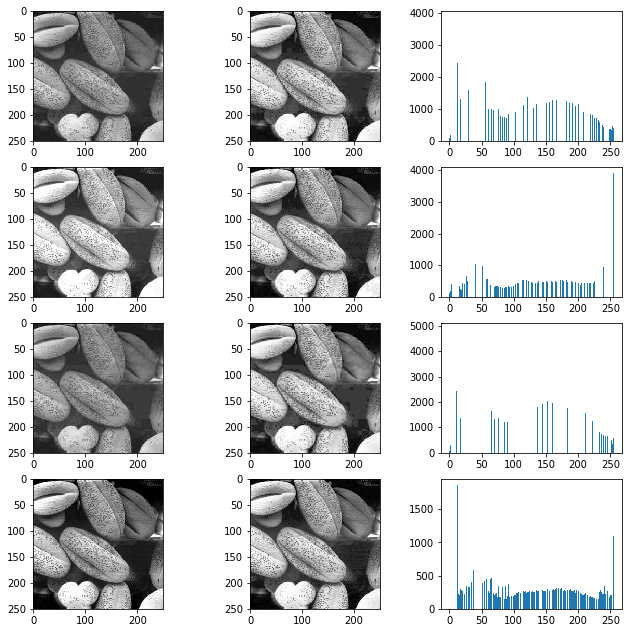

In [31]:
img_1 = cv2.imread('../images/dip/3.20-1.jpg', 0)
img_2 = cv2.imread('../images/dip/3.20-2.jpg', 0)
img_3 = cv2.imread('../images/dip/3.20-3.jpg', 0)
img_4 = cv2.imread('../images/dip/3.20-4.jpg', 0)

def histogram_equalization(img, L):
    
    M, N = img.shape
    hiseq_img = np.zeros(img.shape)
    s_before=0
    for i in range(L):

        idx = np.where(img == i)
        num = img[idx].shape[0]
        if num==0:
            continue
        s = (L-1) / (M*N) * num
        s+=s_before
        hiseq_img[idx] = np.round(s)
        s_before = s
    
    return hiseq_img

img_1_hiseq = histogram_equalization(img_1, 256)
img_2_hiseq = histogram_equalization(img_2, 256)
img_3_hiseq = histogram_equalization(img_3, 256)
img_4_hiseq = histogram_equalization(img_4, 256)

fig, ax = plt.subplots(4,3, figsize=(11,11))
ax[0,0].imshow(img_1, cmap='gray')
ax[0,1].imshow(img_1_hiseq, cmap='gray')
ax[0,2].hist(img_1_hiseq.ravel(),  bins=255, rwidth=0.8, range=(0, 255))
ax[1,0].imshow(img_2, cmap='gray')
ax[1,1].imshow(img_2_hiseq, cmap='gray')
ax[1,2].hist(img_2_hiseq.ravel(),  bins=255, rwidth=0.8, range=(0, 255))
ax[2,0].imshow(img_3, cmap='gray')
ax[2,1].imshow(img_3_hiseq, cmap='gray')
ax[2,2].hist(img_3_hiseq.ravel(),  bins=255, rwidth=0.8, range=(0, 255))
ax[3,0].imshow(img_4, cmap='gray')
ax[3,1].imshow(img_4_hiseq, cmap='gray')
ax[3,2].hist(img_4_hiseq.ravel(),  bins=255, rwidth=0.8, range=(0, 255))

### 直方图匹配(规定化) -- 用于产生处理后有特殊直方图的方法
r为输入图像的灰度级，s为图像均衡后的灰度级，z为直方图匹配后的灰度级，令s为一个有如下特性的随机变量
$$s=T(r)=(L-1)\int_{0}^{r}p_r(w)dw, \quad s_k=T(r_k)=\frac{L-1}{MN}\sum_{j=0}^{k}n_j, k=0,1,2,\cdots,L-1$$
接着，定义一个有如下特性的随机变量z：
$$G(z)=(L-1)\int_{0}^{z}p_z(t)dt=s, \quad G(z_q)=(L-1)\sum_{i=0}^{q}p_z(z_i)$$
由上面两个等式可得$T(r)=G(z)$，所以$z$必须满足以下条件：
$$z=G^{-1}[T(r)]=G^{-1}(s)$$
一旦由输入图像估计出$p_r(r)$，变换函数$T(r)$就能得到，因为$p_z(z)$已知，所以变换函数$G(z)$也可以得到，最终得到z。

总结直方图规定化过程：

1. 计算给定图像的直方图$p_r(r)$，并寻找其直方图均衡变换，把$s_k$四舍五入为范围$[0,L-1]$的整数。
2. 对$q=0,1,2,\cdots,L-1$计算变换函数G的所有值，并四舍五入为范围$[0,L-1]$的整数，将$G$的值存在一个表中。
3. 对每一个值$s_k$使用步骤2存储的G值寻找响应的$z_q$值，当有多值映射时，按惯例选择距离最小的值。（用$s_k$寻找对应在G中的值的下标$z_q$）

Text(0.5,1,'histogram_specification')

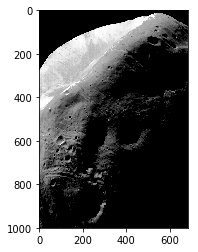

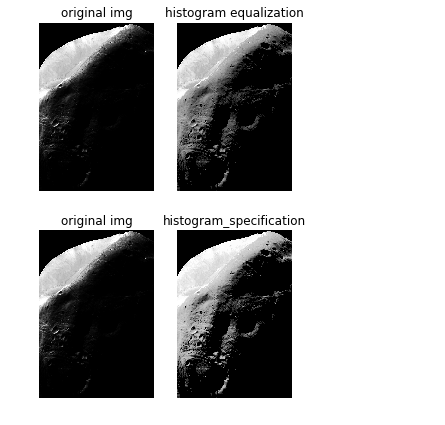

In [4]:
def histogram(img, L):
    
    hist = [[],[]]
    for i in range(L):
        num = np.where(img==i)[0].shape[0]
        hist[0].append(i)
        hist[1].append(num)
    return hist

raw_img = cv2.imread('../images/dip/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0323(a)(mars_moon_phobos).tif', 0)

des_img = cv2.imread('../images/dip/3.25.jpg', 0)
des_hist = histogram(des_img, 256)

# plt.hist(des_img.ravel(), bins=256, rwidth=0.8, range=(0,255))

def histogram_equalization(img, L):
    
    MN = img.ravel().shape[0]
    hiseq_img = img.copy()
    s_list = []
    s_before=0
    for i in range(L):
        idx = np.where(img == i)
        num = img[idx].shape[0]
        s = (L-1) / (MN) * num
        s+=s_before
        hiseq_img[idx] = np.round(s)
        
        s_list.append(np.round(s))
        s_before = s
        
    return hiseq_img, s_list

def calculate_G(hist, L):
    MN = np.sum(hist)
    g_list = []
    g_before = 0
    for i in range(L):
            g = (L-1) / MN * hist[i] + g_before
            g_before = g
            g_list.append(np.round(g))
    
    return g_list

def histogram_specification(G, S, img, L):
        
        G = np.array(G)
        S = np.array(S)
        hs = np.zeros(img.shape)
        for i in range(L):
            distance = np.abs(G[i] - S)
            distance= distance.tolist()
            idx = distance.index(min(distance))
            iidx = np.where(img == i)
            hs[iidx] = idx
        
        return hs
    
# 模拟课本的直方图
# def get_func(x):
#     return np.select([x<5, (x>=5)&(x<20), x>=20], [7*10e4/5*x, (x-5)/(20-5)*(0.7*10e4-7*10e4)+7*10e4, (x-20)/(255-20)*(0-0.7*10e4)+0.7*10e4])

# y = get_func(np.linspace(0,255,256))
# G = calculate_G(y, 256)
# fisrt step
img_hiseq, S = histogram_equalization(raw_img, 256)

# second step
G = calculate_G(np.array(des_hist[1]), 256)

# third step
img_hissp = histogram_specification(G, S, img_hiseq, 256)

fig, ax = plt.subplots(2,3, figsize=(7,7))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i,j].axis('off')
ax[0,0].imshow(raw_img, cmap='gray')
ax[0,1].imshow(img_hiseq, cmap='gray')
# ax[0,2].hist(img_hiseq.ravel(), bins=256, rwidth=0.8, range=(0, 255))
ax[1,0].imshow(raw_img, cmap='gray')
ax[1,1].imshow(img_hissp, cmap='gray')
ax[0,0].set_title('original img')
ax[0,1].set_title('histogram equalization')
ax[1,0].set_title('original img')
ax[1,1].set_title('histogram_specification')
# ax[1,2].hist(img_hissp.ravel(), bins=256, rwidth=0.8, range=(0, 255))

### 局部直方图均衡

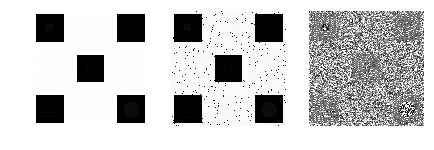

In [56]:
raw_img = cv2.imread('../images/dip/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0326(a)(embedded_square_noisy_512).tif', 0)

def histogram_equalization(img, L):
    
    M, N = img.shape
    hiseq_img = np.zeros(img.shape)
    s_before=0
    for i in range(L):

        idx = np.where(img == i)
        num = img[idx].shape[0]
        if num==0:
            continue
        s = (L-1) / (M*N) * num
        s+=s_before
        hiseq_img[idx] = np.round(s)
        s_before = s
    
    return hiseq_img

def local_histeq(img, L, ks=3):
    
    MN=ks**2
    h, w = img.shape
    
    pad = ks // 2
    out = np.zeros((h+2*pad, w+2*pad))
    out[pad:h+pad, pad:w+pad] = img.copy()

    
    for y in range(pad, h):
        for x in range(pad, w):
            s_before = 0
            tmp = out[y-pad:y+pad+1, x-pad:x+pad+1].copy()
            tmp_ = tmp.copy()
            L_ = list(set(tmp.ravel().tolist()))
            
            for l in L_:
                idx = np.where(tmp_ == l)
                num = img[idx].shape[0]
                s = (L-1) / (MN) * num
                s += s_before
                tmp[idx] = np.round(s)
                s_before = s

            out[y-pad:y+pad+1, x-pad:x+pad+1] = tmp

    return out[pad:h+pad, pad:w+pad]

hiseq_img = histogram_equalization(raw_img, 256)
des_img = local_histeq(raw_img, 256)

fig, ax = plt.subplots(1,3, figsize=(7,7))
for i in range(ax.shape[0]):
        ax[i].axis('off')
        
ax[0].imshow(raw_img, cmap='gray')
ax[1].imshow(hiseq_img, cmap='gray')
ax[2].imshow(des_img, cmap='gray')

### 直方图统计的局部增强

$$
g(x,y) = \left\{\begin{array}{ll}
{E\cdot f(x,y), }&{m_{S_{xy}}\leq k_0 m_G \quad and \quad k_1 \sigma_G \leq \sigma_{S_{xy}} \leq k_2 \sigma_G} \\
{f(x,y), }&{others} 
\end{array}\right.
$$
$E,k_0,k_1,k_2$是规定的参数，$m_G$是输入图像的全局均值，$\sigma_G$是输入图像的标准差，$m_{S_{xy}}, \sigma_{S_{xy}}$分别是局部均值和标准差。

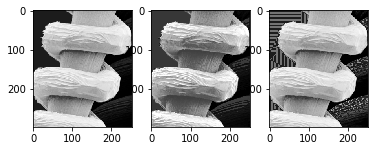

In [55]:
raw_img = cv2.imread('../images/dip/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0327(a)(tungsten_original).tif', 0).astype(np.float)

def local_hist_statistics(img, E=4.0, k0=0.4, k1=0.02, k2=0.4, ksize=3):
    
    mean_g = np.mean(img.ravel())
    sigma_g = np.sqrt(np.var(img.ravel()))

    M, N = img.shape
    pad = ksize // 2
    out = np.zeros((2*pad+M, 2*pad + N), dtype=np.float)
    out[pad:M+pad, pad:N+pad] = img.copy()
    for i in range(M):
        for j in range(N):
            mean_s = np.mean(out[i:i+ksize, j:j+ksize])
            sigma_s = np.sqrt(np.var(out[i:i+ksize, j:j+ksize]))
            if mean_s <= k0*mean_g and k1*sigma_g <= sigma_s and sigma_s <= k2*sigma_g:
                out[i+pad,j+pad] = E* out[i+pad,j+pad] 
    out = np.clip(out, 0, 255)            
    return out[pad:M+pad, pad:N+pad].astype(np.uint8)

hiseq_img = histogram_equalization(raw_img, 256)
lhs_img = local_hist_statistics(raw_img)


fig, ax = plt.subplots(1,3)

ax[0].imshow(raw_img, cmap='gray')
ax[1].imshow(hiseq_img, cmap='gray')
ax[2].imshow(lhs_img, cmap='gray')
            

## 空间滤波基础
### 空间滤波机理
使用大小为$m\times n$的滤波器对大小为$M\times N$的图像进行线性空间滤波，可由下式表示：
$$g(x,y) = \sum_{s=-a}^{a}\sum_{t=-b}^{b}w(s,t)f(x+s,y+t)$$

<div align='center'>
    <img src='../images/dip/3.28.png' width=400 height=400 align=center/>
<div/>
   


### 空间相关与卷积
相关是滤波器模板移过图像并计算每个位置乘积之和的处理。卷积的机理类似，但滤波器首先要旋转180$^\circ$

<div align='center'>
    <img src='../images/dip/3.29.png' width=400 height=400 align=center/>
    一维相关与卷积
<div/>
    
    
<div align='center'>
    <img src='../images/dip/3.30.png' width=400 height=400 align=center/>
    二维相关与卷积
<div/>
    
相关公式：
$w(x,y)$☆$f(x,y)=\sum_{s=-a}^{a}\sum_{t=-b}^{b}w(s,t)f(x+s,y+t)$

卷积公式：
$w(x,y)$★$f(x,y)=\sum_{s=-a}^{a}\sum_{t=-b}^{b}w(s,t)f(x-s,y-t)$

### 平滑滤波器
#### 线性平滑滤波器
<div align='center'>
    <img src='../images/dip/3.32.png' width=400 height=400 align=center/>
    两个均值滤波器
<div/>

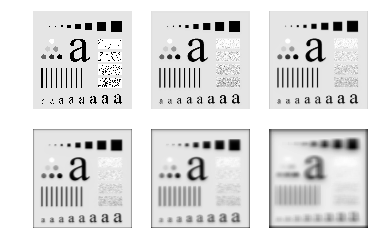

In [23]:
raw_img = cv2.imread('../images/dip/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0333(a)(test_pattern_blurring_orig).tif', 0)

def mean_filter(img, K=3):
    
    M, N  = img.shape
    pad = K // 2
    out = np.zeros((pad*2 + M, pad*2 + N)).astype(np.float32)
    out[pad:pad+M, pad:pad+N] = img.copy()
        
    for i in range(M):
        for j in range(N):
            
            out[i+pad, j+pad] = np.mean(out[i:i+K, j:j+K])
            
    return out[pad:pad+M, pad:pad+N].astype(np.uint8)

fig, ax = plt.subplots(2,3)
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i,j].axis('off')
        
ax[0,0].imshow(raw_img, cmap='gray')
ax[0,1].imshow(mean_filter(raw_img), cmap='gray')
ax[0,2].imshow(mean_filter(raw_img, K=5), cmap='gray')
ax[1,0].imshow(mean_filter(raw_img, K=9), cmap='gray')
ax[1,1].imshow(mean_filter(raw_img, K=15), cmap='gray')
ax[1,2].imshow(mean_filter(raw_img, K=35), cmap='gray')


#### 统计排序(非线性)滤波器
中值滤波器对处理脉冲噪声非常有效，这种噪声也称为椒盐噪声，因为这种噪声是以黑白点的形式叠加在图像上的。

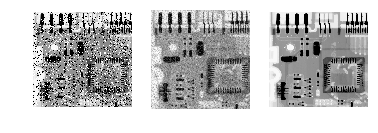

In [51]:

raw_img = cv2.imread('../images/dip/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif', 0)

def median_filter(img, K=3):
    
    M, N = img.shape
    pad = K // 2
    
    out = np.zeros((pad*2+M, pad*2+N)).astype(np.float32)
    out[pad:pad+M, pad:pad+N] = img.copy()
    
    for i in range(M):
        for j in range(N):
            out[i+pad, j+pad] = np.median(out[i:i+K, j:j+K])

    return out[pad:pad+M, pad:pad+N].astype(np.uint8)

fig, ax = plt.subplots(1,3)
for i in range(ax.shape[0]):
        ax[i].axis('off')
        
ax[0].imshow(raw_img, cmap='gray')
ax[1].imshow(mean_filter(raw_img), cmap='gray')
ax[2].imshow(median_filter(raw_img), cmap='gray')

### 锐化空间滤波器

锐化处理的主要目的是突出灰度的过渡部分，可由空间微分来实现，图像微分增强边缘和其他突变（如噪声），而削弱灰度变化缓慢的区域。

一维函数$f(x)$，其一阶微分的基本定义是差值：
$$\frac{\partial f}{\partial x} = f(x+1) - f(x)$$

其二阶微分：
$$\frac{\partial^2 f}{\partial x^2} = f(x+1)+f(x-1)-2f(x)$$
<div align='center'>
    <img src='../images/dip/3.36.png' width=400 height=400 align=center/>
    一阶微分和二阶微分说明
<div/>
    
数字图像中的边缘在灰度上常常类似于斜坡过渡，这样就导致图像的一阶微分产生较粗的边缘，因为沿着斜坡的微分非零。另一方面，二阶微分产生由零分开的一个像素宽的双边缘，由此得出结论，二阶微分在增强细节方面要比一阶微分好得多，适合锐化图像。



#### 使用二阶微分进行图像锐化--拉普拉斯算子

各向同性滤波器指的是滤波器的响应与滤波器作用的图像的突变方向无关，也就是说，各向同性滤波器是旋转不变的，即将原图像旋转后进行滤波处理给出的结果与现对图像滤波后再旋转的结果相同。最简单的各向同性微分算子是拉普拉斯算子，一个二维图像函数$f(x,y)$的拉普拉斯算子定义为：
$$\nabla^2=\frac{\partial^2 f}{\partial x^2}+\frac{\partial^2 f}{\partial y^2}$$
在x方向上我们有：
$$\frac{\partial^2 f}{\partial x^2} = f(x+1,y)+f(x-1,y)-2f(x,y)$$
在y方向上我们有：
$$\frac{\partial^2 f}{\partial x^2} = f(x,y+1)+f(x,y-1)-2f(x,y)$$
所以两个变量的离散拉普拉斯算子是：
$$\nabla^2 f(x,y)= f(x+1,y)+f(x-1,y)-2f(x,y) + f(x,y+1)+f(x,y-1)-2f(x,y)$$

可用如下滤波模板实现：
<div align='center'>
    <img src='../images/dip/3.37.png' width=400 height=400 align=center/>
<div/>
    
拉普拉斯算子强调的是图像中灰度的突变，并不强调灰度级缓慢变化的区域，这将产生把浅灰色边线和突变点叠加到暗色背景中的图像，将原图像和拉普拉斯图像叠加在一起就可以复原背景特效并保持拉普拉斯锐化处理的效果，叠加时要注意中心系数，若其为负，则应该两幅图像相减得到锐化图像。
$$g(x,y)=f(x,y)+c[\nabla^2 f(x,y)]$$
其中，$f(x,y)$和$g(x,y)$分别是输入图像和锐化后的图像。

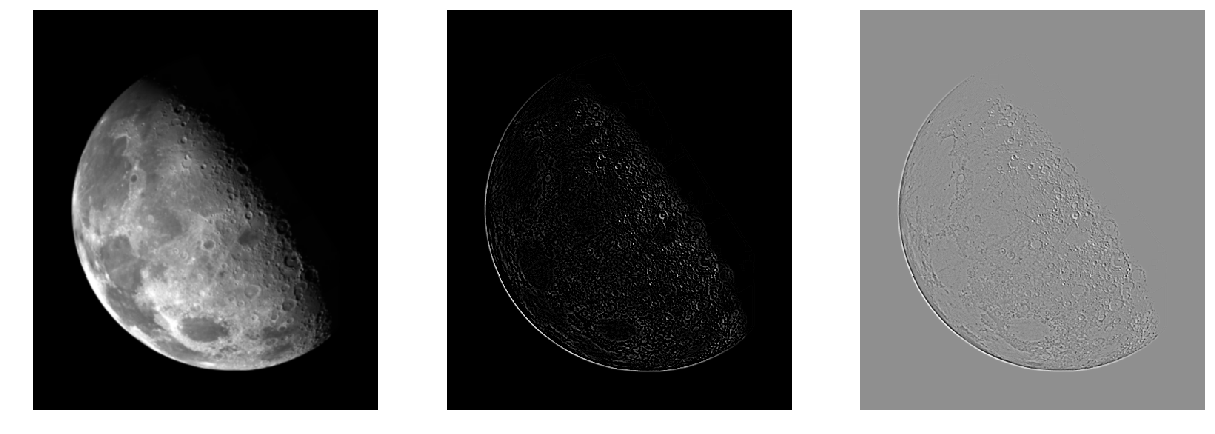

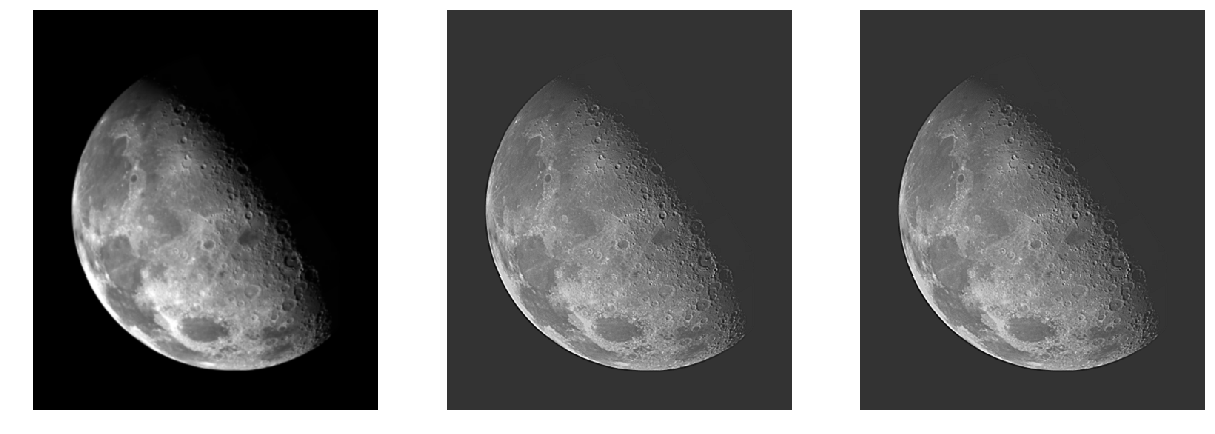

In [15]:
raw_img = cv2.imread('../images/dip/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0338(a)(blurry_moon).tif', 0).astype(np.float)
def laplace_filter(img, K=[[0., 1., 0.], 
                                            [1., -4., 1.],
                                            [0., 1., 0.]], K_size=3):
    
    M, N = img.shape

    pad = K_size // 2
    out = np.zeros((pad*2 + M, pad*2 + N), dtype=np.float)
    out[pad:pad+M, pad:pad+N] = img.copy()
    temp = out.copy()
    
    K = [[0., 1., 0.], 
             [1., -4., 1.],
             [0., 1., 0.]]
#     K = [[1., 1., 1.], 
#              [1., -8., 1.],
#              [1., 1., 1.]]
    
    for i in range(M):
        for j in range(N):
            out[i+pad, j+pad] = np.sum(K * temp[i:i+K_size, j:j+K_size])
#     out = np.clip(out, 0, out.max())       
    return out[pad:pad+M, pad:pad+N]#.astype(np.uint8)

def scale(img, K=255):

    img = img - img.min()
    img = K * (img / img.max())
    
    return img#.astype(np.uint8)


fig, ax = plt.subplots(1,3, figsize=(21,21))
for i in range(ax.shape[0]):
        ax[i].axis('off')
        
laplace_img = laplace_filter(raw_img)
laplace_img_scaled = scale(laplace_img)
result_1 = scale(raw_img - laplace_img_scaled).astype(np.uint8)

laplace_img = laplace_filter(raw_img, K= [[1., 1., 1.], 
                                                                      [1., -8., 1.],
                                                                      [1., 1., 1.]])
laplace_img_scaled = scale(laplace_img)
result_2 = scale(raw_img - laplace_img_scaled).astype(np.uint8)

ax[0].imshow(raw_img, cmap='gray')
ax[1].imshow(np.clip(laplace_img, 0, 255).astype(np.uint8), cmap='gray')
ax[2].imshow(laplace_img_scaled, cmap='gray')
fig, ax = plt.subplots(1,3, figsize=(21,21))
for i in range(ax.shape[0]):
        ax[i].axis('off')
ax[0].imshow(raw_img, cmap='gray')
ax[1].imshow(result_1, cmap='gray')
ax[2].imshow(result_2, cmap='gray')


### 非锐化掩蔽和高提升滤波
非锐化掩蔽处理过程是从原图像中减去一幅非锐化（平滑过的）版本，具体由下列步骤组成：
1. 模糊原图像
2. 从原图像中减去模糊图像（产生的差值图像成为模板）
3. 将模板加到原图像上

令$\overline{f}(x,y)$表示模糊图像，非锐化掩蔽以公式形式描述如下。首先得到模板：
$$g_mask(x,y)=f(x,y)-\overline{f}(x,y)$$
然后在原图像上加上该模板的一个权重部分：
$$g(x,y) = f(x,y) + k*g_mask(x,y)$$

其中$k\geq 0$，当$k=1$时，得到非锐化掩蔽。当$k>1$时，该处理为高提升滤波。选择$k<1$时则不强调非锐化模板的贡献。

<div align='center'>
    <img src='../images/dip/3.39.png' width=400 height=400 align=center/>
<div/>
    

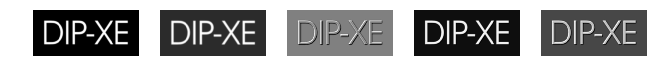

In [122]:
raw_img = cv2.imread('../images/dip/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0340(a)(dipxe_text).tif', 0).astype(np.float)

def gaussian_filter(img, K_size=3, sigma=3):
    
    M, N = img.shape
    pad = K_size // 2
    
    out = np.zeros((pad*2+M, pad*2+N), dtype=np.float)
    out[pad:pad+M, pad:pad+N] = img.copy()
    
    temp = out.copy()
    
    K = np.zeros((K_size, K_size))
    for i in range(-pad, -pad+K_size):
        for j in range(-pad, -pad+K_size):
            K[i, j] = np.exp(-(i**2 + j**2)) / (2*sigma**2)
    
    K /= np.sum(K)
    
    for i in range(M):
        for j in range(N):
            out[i+pad, j+pad] = np.sum(K* temp[i:i+K_size, j:j+K_size])
            
    out = np.clip(out, 0, 255)
    
    return out[pad:pad+M, pad:pad+N].astype(np.uint8)

fig, ax = plt.subplots(1,5, figsize=(11,11))
for i in range(ax.shape[0]):
        ax[i].axis('off')

gaussian_img = gaussian_filter(raw_img)
g_mask = raw_img - gaussian_img
g = raw_img + g_mask
g_ = raw_img + 4.5*g_mask

ax[0].imshow(raw_img.astype(np.uint8), cmap='gray')
ax[1].imshow(gaussian_img, cmap='gray')
ax[2].imshow(g_mask, cmap='gray')
ax[3].imshow(g, cmap='gray')
ax[4].imshow(g_, cmap='gray')

### 使用一阶微分对（非线性）图像锐化--梯度

图像处理中的一阶微分使用梯度幅值来实现的，对于函数$f(x,y)$，$f$在坐标$(x,y)$处的梯度定义为二维列向量：
$$\nabla f=grad(f)=\begin{bmatrix} g_x \\ g_y \end{bmatrix}=\begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix}$$
该向量具有重要的几何特性，即它指出了在位置$(x,y)$处f的最大变化率的方向。向量$\nabla$的幅度值(长度)表示为$M(x,y)$，即：
$$M(x,y)=mag(\nabla f) = \sqrt{g_x^2+g_y^2}$$
它是梯度向量方向变化率在$(x,y)$处的值。注意$M(x,y)$是与原图像大小相同的图像，该图像称为梯度图像。某些实现中，用绝对值近似平方和平方根操作更适合计算：
$$M(x,y)=mag(\nabla f) = |g_x|+|g_y|$$

一阶微分的最简近似是$g_x=(z_8-z_5)$和$g_y=(z_6-z_5)$，由Roberts提出的交叉差分：
$$g_x=(z_9-z_5)\text{和} g_y=(z_8-z_6)$$
可使用图3.41(b)中的两个线性滤波器模板实现，其称为罗伯特交叉梯度算子。
<div align='center'>
    <img src='../images/dip/3.41.png' width=400 height=400 align=center/>
<div/>

我们感兴趣的最小模板是$3\times 3$模板，使用$z_5$为中心的一个$3\times 3$领域对$g_x$和$g_y$的近似如下式所示：
$$g_x=\frac{\partial f}{\partial x} = (z_7+2z_8+z9)-(z_1+2z_2+z_3)$$
和
$$g_x=\frac{\partial f}{\partial x} = (z_3+2z_6+z9)-(z_1+2z_4+z_7)$$

$$M(x,y)=|(z_7+2z_8+z9)-(z_1+2z_2+z_3)| + |(z_3+2z_6+z9)-(z_1+2z_4+z_7)|$$

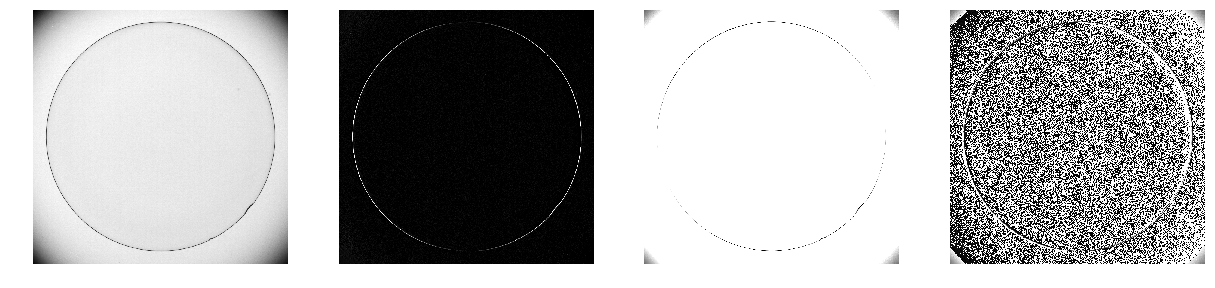

In [44]:
raw_img = cv2.imread('../images/dip/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0342(a)(contact_lens_original).tif', 0).astype(np.float)

def sobel_filter(img, K_size=3):
    
    M, N = img.shape
    pad = K_size // 2
    
    out = np.zeros((pad*2+M, pad*2+N), dtype=np.float)
    out[pad:pad+M, pad:pad+N] = img.copy()

    temp = out.copy()
    out_h = out.copy()
    out_v = out.copy()
    
    Kh = [[-1., 0., 1.], [-2., 0., 2.], [-1, 0, 1 ]]
    Kv = [[-1., -2., 1.], [0, 0, 0], [1., 2, 1]]
    
    for i in range(M):
        for j in range(N):
            out_h[i+pad, j+pad] = np.sum(Kh* temp[i:i+K_size, j:j+K_size])
            out_v[i+pad, j+pad] = np.sum(Kv* temp[i:i+K_size, j:j+K_size])
            
    out_h = np.clip(out_h, 0, 255)
    out_v = np.clip(out_v, 0, 255)
    
    return out_h[pad:pad+M, pad:pad+N].astype(np.uint8), out_v[pad:pad+M, pad:pad+N].astype(np.uint8)

grad_h, grad_v = sobel_filter(raw_img)
M = np.abs(grad_h) + np.abs(grad_v)

fig, ax = plt.subplots(1,4, figsize=(21,21))
for i in range(ax.shape[0]):
        ax[i].axis('off')

ax[0].imshow(raw_img.astype(np.uint8), cmap='gray')
ax[1].imshow(grad_h, cmap='gray')
ax[2].imshow(grad_v, cmap='gray')
ax[3].imshow(M, cmap='gray')

### 混合空间增强法

(800, 500)


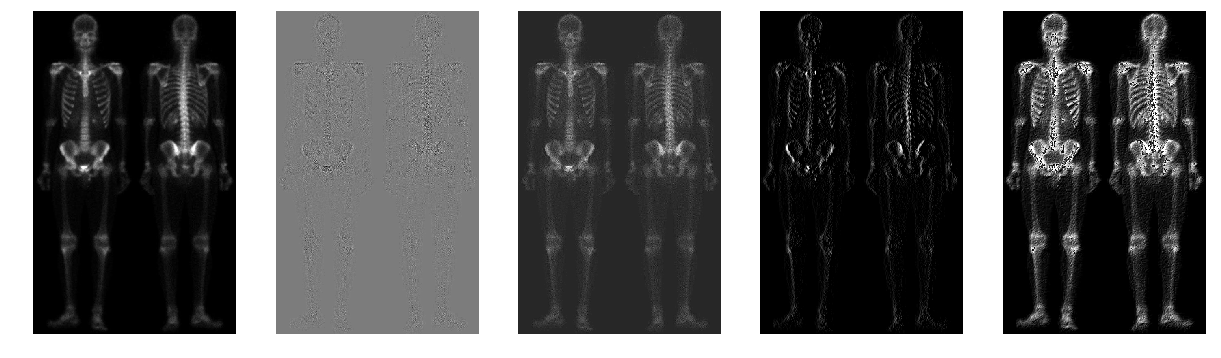

In [26]:
raw_img = cv2.imread('../images/dip/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0343(a)(skeleton_orig).tif', 0).astype(np.float)
laplace_img_scaled = scale(laplace_filter(raw_img))
grad_h, grad_v = sobel_filter(raw_img)
result_2 = scale(raw_img - laplace_img_scaled).astype(np.uint8)
M = np.abs(grad_h) + np.abs(grad_v)

fig, ax = plt.subplots(1,5, figsize=(21,21))
for i in range(ax.shape[0]):
        ax[i].axis('off')

ax[0].imshow(raw_img.astype(np.uint8), cmap='gray')
ax[1].imshow(laplace_img_scaled, cmap='gray')
ax[2].imshow(result_2, cmap='gray')
ax[3].imshow(grad_h, cmap='gray')
ax[4].imshow(M, cmap='gray')

Text(0.5,1,'h')

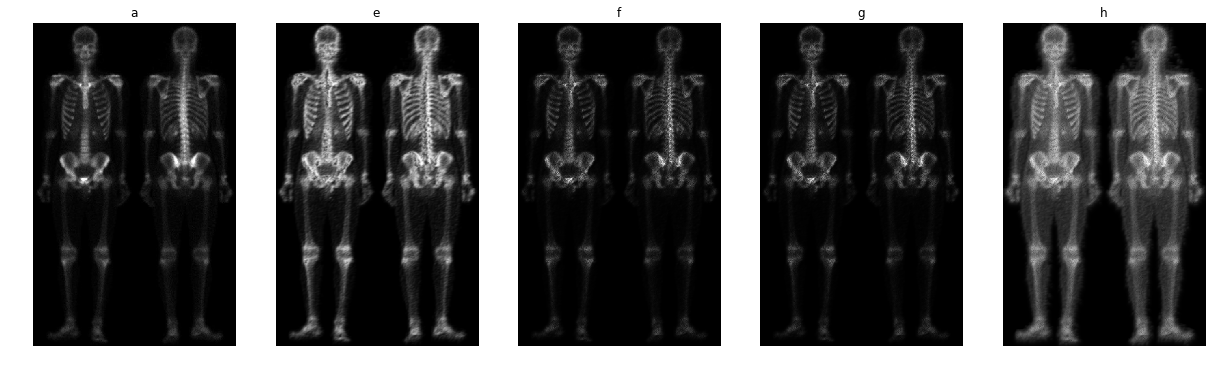

In [42]:
def mean_filter(img, K=3):
    
    M, N  = img.shape
    pad = K // 2
    out = np.zeros((pad*2 + M, pad*2 + N)).astype(np.float32)
    out[pad:pad+M, pad:pad+N] = img.copy()
        
    for i in range(M):
        for j in range(N):
            
            out[i+pad, j+pad] = np.mean(out[i:i+K, j:j+K])
            
    return out[pad:pad+M, pad:pad+N]

mean_img = mean_filter(M, K=5)
mask = result_2*mean_img
f = mask + raw_img
h = f**(0.4)

fig, ax = plt.subplots(1,5, figsize=(21,21))
for i in range(ax.shape[0]):
        ax[i].axis('off')

ax[0].imshow(raw_img.astype(np.uint8), cmap='gray')
ax[1].imshow(mean_img.astype(np.uint8), cmap='gray')
ax[2].imshow(mask, cmap='gray')
ax[3].imshow(f, cmap='gray')
ax[4].imshow(h, cmap='gray')
ax[0].set_title('a')
ax[1].set_title('e')
ax[2].set_title('f')
ax[3].set_title('g')
ax[4].set_title('h')

# 频率域滤波
## 傅里叶级数与傅里叶变换
**任何周期函数都可以表示为不同频率的正弦和/或余弦之和的形式，每个正弦项/或余弦项乘以不同的系数，现在称该和为傅里叶级数。**

**甚至费周期函数（但该曲线下的面积是有限的）也可以用正弦和/或余弦乘以加权函数的积分来表示，在这种情况下的公式就是傅里叶变换。**
<div align='center'>
    <img src='../images/dip/4.1.png' width=500 height=500 align=center/>
<div/>


    
## 基本概念
### 复数
复数C的定义：
$$C=R+jI$$
共轭复数$C^*$：
$$C=R-jI$$
复数从几何的角度可以被看成是平面（称为复平面）上的一个点，其横坐标是实轴（R的值），其纵坐标是虚轴（I的值）。

极坐标：
$$C=|C|(cos\theta + jsin\theta)$$
其中，$|C|=\sqrt{R^2+I^2}$是复平面的原点到点$(R,I)$的向量长度，$\theta$是该向量与实轴的夹角。

使用欧拉公式：
$$e^{j\theta}=cos\theta + jsin\theta$$
可得到极坐标下的复数表示：
$$C=|C|e^{j\theta}$$
提示：

    角度的定义：两条射线从圆心向圆周射出，形成一个夹角和夹角正对的一段弧。当这段弧长正好等于圆周长的360分之一时，两条射线的夹角的大小为1度。

    弧度的定义：两条射线从圆心向圆周射出，形成一个夹角和夹角正对的一段弧。当这段弧长正好等于圆的半径时，两条射线的夹角大小为1弧度。

    角度 = 弧度 * 180° / Math.PI

    弧度 = 角度 * Math.PI / 180°

### 傅里叶级数
具有周期T的连续变量t的周期函数$f(t)$可以被描述为乘以适当系数的正弦和余弦和：
$$f(t)=\sum_{n=-\infty}^{\infty}c_n e^{j\frac{2\pi n}{T}t}$$
其中
$$c_n = \frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)e^{-j\frac{2\pi n}{T}t}dt,\quad n=0, \pm1, \pm2, \cdots$$

### 冲激及其取样特性
线性系统和傅里叶变换研究的核心是冲激及其取样特性。连续变量$t$在$t=0$处的单位冲激表示为$\delta(t)$，其定义是：
$$\delta(t)= \left\{\begin{array}{ll}
{\infty,} & {t=0} \\
{0,} & {t\neq 0}
\end{array}\right.$$

它还被限制为满足等式：
$$\int^{\infty}_{-\infty}\delta(t)dt=1$$

取样：
$$\int^{\infty}_{-\infty}f(t)\delta(t)dt=f(0)$$
$$\int^{\infty}_{-\infty}f(t-t_0)\delta(t)dt=f(t_0)$$

离散形式：
$$
\delta(x)=\left\{\begin{array}{ll}
1, & {x=0} \\ 
0, & {x\neq 0}
\end{array}\right.
$$

限制等式的离散形式：
$$\sum^{\infty}_{n=-\infty}\delta(x)=1$$
离散形式的取样：
$$\sum^{\infty}_{n=-\infty}\delta(x)f(x)dt=f(0)$$
$$\sum^{\infty}_{n=-\infty}\delta(x)f(x-x_0)dt=f(x_0)$$

冲激串：
$$S_{\Delta T}(t)=\sum^{\infty}_{n=-\infty}\delta(t-n\Delta T)$$
<div align='center'>
    <img src='../images/dip/4.3.png' width=500 height=500 align=center/>
<div/>

### 连续变量函数的傅里叶变换
由$\mathscr{F}[f(t)]$表示的连续变量$t$的连续函数$f(t)$的傅里叶变换由下式定义：
$$\mathscr{F}[f(t)]=F(\mu)=\int^{\infty}_{-\infty}f(t)e^{-j2\pi \mu t}$$
其中$\mu$也是一个连续变量，因为$t$被积分过了，故$\mathscr{F}[f(t)]$仅是$\mu$的函数。
相反，给定$F(\mu)$，通过傅里叶反变换可以获得$f(t)$，即$f(t)=\mathscr{F}^{-1}[F(\mu)]$
$$f(t)=\int^{\infty}_{-\infty}F(\mu)e^{j2\pi \mu t} d\mu$$

例4.1 求一个简单函数的傅里叶变换：
$$
\begin{equation}\begin{aligned}
F(\mu) &=\int_{-\infty}^{\infty} f(t) e^{-j 2 \pi \mu t} d t=\int_{-W / 2}^{W / 2} A e^{-j 2 \pi \mu t} d t \\
&=\frac{-A}{j 2 \pi \mu}\left[e^{-j 2 \pi \mu t}\right]_{-w / 2}^{w / 2}=\frac{-A}{j 2 \pi \mu}\left[e^{-j \pi \mu W}-e^{j \pi \mu W}\right] \\
&=\frac{A}{j 2 \pi \mu}\left[e^{j \pi \mu W}-e^{-j \pi \mu W}\right] \\
&=A W \frac{\sin (\pi \mu W)}{(\pi \mu W)}
\end{aligned}\end{equation}
$$

其中利用了三角学恒等式$sin\theta=\frac{(e^{j\theta}-e^{-j\theta})}{2j}$，$sinc$函数：
$$sinc(m)=\frac{sin(\pi m)}{\pi m}$$
<div align='center'>
    <img src='../images/dip/4.4.png' width=500 height=500 align=center/>
<div/>
    
例4.2 冲激和冲激串的傅里叶变换
位于原点的单位冲激的傅里叶变换：
$$F(\mu)=\int^{\infty}_{-\infty}f(t)\delta(t)=e^0=1$$
类似地，位于$t=t_0$的一个冲激的傅里叶变换是：
$$F(\mu)=\int^{\infty}_{-\infty}\delta(t-t_0) e^{-j2\pi \mu t}dt=\int^{\infty}_{-\infty}e^{-j2\pi \mu t}\delta(t-t_0) dt=e^{-j2\pi \mu t_0}$$

**推导冲激串的傅里叶变换**

定理，若：
$$\mathscr{F}[f(t)]=F(\mu)$$
则：
$$\mathscr{F}[F(t)] = f(-\mu)$$
因为：
$$f(t)=\int^{\infty}_{-\infty}F(\mu)e^{j2\pi \mu t}d\mu \quad \text{(反变换)}$$
显然：
$$f(-t)=\int^{\infty}_{-\infty}F(\mu)e^{-j2\pi \mu t}d\mu$$
将变量$t$与$\mu$互换，可得：
$$f(-\mu)=\int^{\infty}_{-\infty}F(t)e^{-j2\pi \mu t}dt $$
所以：
$$\mathscr{F}[F(t)]= f(-\mu)$$

前面给出的冲激串$\delta(t-t_0)$的傅里叶变换是$e^{-j2\pi \mu t_0}$，所以根据对称性，$e^{-j2\pi \mu t_0}$的傅里叶变换是$\delta(-\mu-t_0)$($\mu$才是变量，$t_0$是常数，所以直接在$\mu$前添加负号)。

令$-t_0=a$，可得<font color=red>$e^{j2\pi a t}$</font>的傅里叶变换是<font color=red>$\delta(-\mu+a)=\delta(\mu-a)$</font>（最后一步的两个式子都是冲激函数$\delta$在$\mu=a$时不为零，所以它们是表示同一个冲激函数，而只是函数表达形式不同）。

因为冲激串$s_{\Delta T}(t)$是周期为$\Delta T$的周期函数，所以它可表示为一个傅里叶级数：
$$S_{\Delta T}(t)=\sum^{\infty}_{-\infty}c_n e^{j \frac{2\pi n}{\Delta T}t}$$
其中$c_n$可由下式并用冲激的性质得出：
$$c_n=\frac{1}{\Delta T}\int^{\frac{\Delta T}{2}}_{-\frac{\Delta T}{2}}S_{\Delta T}(t)e^{-j \frac{2\pi n}{\Delta T}t} dt=\frac{1}{\Delta T}e^0=$$

所以冲激串的傅里叶级数可展开为：
$$s_{\Delta T}(t)=\frac{1}{\Delta T}\sum^{\infty}_{-\infty} e^{j \frac{2\pi n}{\Delta T}t}$$

因为求和是线性过程，得到和的傅里叶变换与求各个分量的傅里叶变换之和是相同的。这些分量是指数形式，而在上面已经求出其傅里叶变换：
$$\mathscr{F}[e^{j \frac{2\pi n}{\Delta T}t}]=\delta(\mu- \frac{n}{\Delta T})$$
因此，周期冲激串$s_{\Delta T}(t)$的傅里叶变换$S(\mu)$是：
$$S(\mu)=\mathscr{F}[s_{\Delta T}(t)]=\mathscr{F}[\frac{1}{\Delta T}\sum^{\infty}_{-\infty} e^{j \frac{2\pi n}{\Delta T}t}]=\frac{1}{\Delta T}\mathscr{F}[\sum^{\infty}_{-\infty} e^{j \frac{2\pi n}{\Delta T}t}]=\frac{1}{\Delta T}\sum^{\infty}_{-\infty}\delta(\mu- \frac{n}{\Delta T})$$

### 卷积
两个连续变量$t$的两个连续函数$f(t)$和$h(t)$的卷积：
$$f(t)\bigstar h(t)=\int^{\infty}_{-\infty}f(\tau)h(t-\tau)d\tau$$

上式的傅里叶变换为：
$$\mathscr{F}[f(t)\bigstar h(t)]=\int^{\infty}_{-\infty}[\int^{\infty}_{-\infty}f(\tau)h(t-\tau)d\tau]e^{-j2\pi \mu t}dt = \int^{\infty}_{-\infty}f(\tau)[\int^{\infty}_{-\infty}h(t-\tau)e^{-j2\pi \mu t}dt]d\tau$$

方括号中项是$h(t-\tau)$的傅里叶变换，$\mathscr{F}[h(t-\tau)]=H(\mu)e^{-j2\pi \mu \tau}$(由平移性质得到)，所以：
$$\mathscr{F}[f(t)\bigstar h(t)]=\int^{\infty}_{-\infty}f(\tau)[H(\mu)e^{-j2\pi \mu \tau}]d\tau=H(\mu)\int^{\infty}_{-\infty}f(\tau)e^{-j2\pi \mu \tau}d\tau=H(\mu)F(\mu)$$

即空间域两个函数的卷积的傅里叶变换等于两个函数的傅里叶变换在频率域中的乘积。反过来，如果有两个变换的乘积，那么我们可以通过计算傅里叶反变换得到空间域的卷积。换句话说，$f(t)\bigstar h(t)$和$H(\mu)F(\mu)$是傅里叶变换对，这结果是卷积定理的一半：
$$f(t)\bigstar h(t)\Leftrightarrow H(\mu)F(\mu)$$
卷积定理的另一半是：
$$f(t)h(t)\Leftrightarrow H(\mu)\bigstar F(\mu)$$

## 取样和取样函数的傅里叶变换
### 取样

模拟取样的一种方法是用一个$\Delta T$单位间隔的冲激串作为取样函数去乘以$f(t)$，即：
$$\tilde{f}(t)=f(t)s_{\Delta T}(t)=\sum^{\infty}_{-\infty}f(t)\delta(t-\Delta T)$$
序列中的任意取样值$f_k$由下式给出：
$$f_k=\int^{\infty}_{-\infty}f(t)\delta(t-k\Delta T)=f(k \Delta T)$$

<div align='center'>
    <img src='../images/dip/4.5.png' width=500 height=500 align=center/>
<div/>

### 取样函数的傅里叶变换

令$F(\mu)$代表连续函数$f(t)$的傅里叶变换，则$\tilde{F}(\mu)$代表取样后的函数$\tilde{f}(t)$的傅里叶变换，
$$\tilde{F}(\mu)=\mathscr{F}[\tilde{f}(t)]=\mathscr{F}[f(t)s_{\Delta T}(t)]=F(\mu)\bigstar S(\mu)$$
其中冲激串的傅里叶变换是：
$$S(\mu)=\frac{1}{\Delta T}\sum^{\infty}_{n=-\infty}\delta(\mu- \frac{n}{\Delta}) $$

所以：
$$
\begin{equation}\begin{aligned}
\tilde{F}(\mu) &=F(\mu)\bigstar S(\mu)=\int^{\infty}_{-\infty}F(\tau)S(\mu-\tau)d\tau \\
&= \frac{1}{\Delta T}\int^{\infty}_{-\infty}F(\tau)\sum^{\infty}_{n=-\infty}\delta(\mu-\tau- \frac{n}{\Delta T})d\tau \\
&= \frac{1}{\Delta T}\sum^{\infty}_{n=-\infty}\int^{\infty}_{-\infty}F(\tau)\delta(\mu- \tau-\frac{n}{\Delta T})d\tau \quad\text{冲激取样性质}(-\tau+\mu-\frac{n}{\Delta}) = (\tau-(\mu-\frac{n}{\Delta T})) \\
&= \frac{1}{\Delta T}\sum^{\infty}_{n=-\infty}F(\mu-\frac{n}{\Delta T})
\end{aligned}\end{equation}
$$

由上式可知，取样后的函数$\tilde{f(t)}$的傅里叶变换$\tilde{F}(\mu)$是$F{\mu}$的一个拷贝的无限、周期序列，也是原始连续函数的傅里叶变换。拷贝间隔有$\frac{1}{\Delta T}$的值决定，$\tilde{F}(\mu)$是一个连续函数。

<div align=center>
    <img src='../images/dip/4.6.png' width=400 height=400 align='center'/>
</div>

### 取样定理

<font color=red>对于以原点为中心的有限区间(带宽)$[\mu_{max}, \mu_{max}]$之外的频率值，其傅里叶变换为零的函数$f(t)$称为带限函数，例如纯正弦波具有单一频率，所以它是带限函数</font>，如图4.7(a)。如果能从$F(\mu)$中包含的这个函数的拷贝的周期序列中分离出$F(\mu)$的一个拷贝，那么我们就可以从取样后的版本复原$f(t)$。根据图4.7(b)，如果$\frac{1}{2\Delta T}>\mu_{max}$或者：
$$\frac{1}{\Delta T}>2\mu_{max}$$
可保证有足够大的间距。该公式指出，<font color=red>如果以超过函数最高频率的两倍的取样率来获得样本，连续函数的带限函数可以完全地从它的样本集来恢复，这就是取样定理。</font>（其中，$\mu_{max}$是原始信号的最高频率，$\Delta T$是取样间隔，$\frac{1}{\Delta T}$为取样率）
<div align=center>
    <img src='../images/dip/4.7.png' width=400 height=400 align='center'/>
</div>

### 混淆

如果一个带限函数用低于其最高频率的两倍取样率将会发生什么情况？这相当于欠取样情况，如图4.9(a)。
<div align=center>
    <img src='../images/dip/4.9.png' width=400 height=400 align='center'/>
</div>

没有有限持续时间的函数是带限的，一个带限函数的变化一定从$-\infty$扩展到$\infty$。<font color=red>（用门函数将$h(t)$与$f(t)$限制在某区间时，其乘积的变换就是两个函数变换的卷积$F(\mu)\bigstar H(\mu)$，虽然$F(\mu)$是带限的，但$H(\mu)$是无限扩展的，它们的卷积结果是频率分类无限扩展的结果，导致$\tilde{F}(\mu)$中周期与周期间的存在混淆，就是因为它的每个分量都是无限的，导致尾巴处存在混淆。）</font>
所以，用有限长度的取样和记录工作，混淆是一个不可以避免的事实。在实践中，可以通过平滑输入函数减少高频分量的方法（如对图像采用散焦方法）来降低混淆的影响，这种处理成为抗混淆，它必须在函数被取样之前完成，因为混淆是一个取样问题，而取样问题不能使用计算机技术“事后取消”。

### 混淆例子
<div align=center>
    <img src='../images/dip/4.10.png' width=500 height=500 align='center'/>
</div>

假设图中的正弦波用式$sin\pi (t)$来表示，并且水平轴对应时间t（单位为秒），函数在$t=\cdots,-1,0,1,2,\cdots$与时间轴相交。

$sin\pi (t)$的周期$T$是2s，其频率是$\frac{1}{T}=\frac{1}{2}$周期/秒，根据取样定理，当取样率$\frac{1}{\Delta T}$超过其最高频率的两倍，才可以由取样后的一组样本复原该信号，这意味着取样率大于1个样本/秒$[2\times \frac{1}{2}=1]$或$\Delta T < 1s$ ，才能复原$sin\pi (t)$信号。显然，以准确的两倍频率的取样率对信号取样，在$t=\cdots,-1,0,1,2,\cdots$处得到的样本室$\cdots,sin(-\pi),sin(0),sin(\pi),sin(2\pi),\cdots$，它们都是零，不可能复原该信号。当取样率以小于一个样本/秒对信号均匀取样后得到样本如图4.10中的小黑点，取样后的信号看上去像正弦波，但是其频率是原始信号要小得多。

### 由取样后的数据重建(复原)函数
<div align=center>
    <img src='../images/dip/4.8.png' width=500 height=500 align='center'/>
</div>
图4.8说明了一个带限函数使用频率域方法由其样本完美复原的过程。使用卷积定理，我们可以再空间域得到等价的结果。$F(\mu)=H(\mu)\tilde{F}(\mu)$，可知
$$f(t)=\mathscr{F}[F(\mu)]=\mathscr{F}[H(\mu)\tilde{F}(\mu)]=h(t)\bigstar \tilde{f}(t)$$

首先求$h(t)$：
$$
\begin{equation}\begin{aligned}
h(t)&=\int^{\infty}_{-\infty}H(\mu)e^{j2\pi \mu t}d\mu \\
&=\int^{\frac{1}{2\Delta T}}_{-\frac{1}{2\Delta T}}\Delta T e^{j2\pi \mu t}d\mu \\
&= \Delta T \frac{1}{j2\pi t } e^{j2\pi \mu t}|^{\frac{1}{2\Delta T}}_{-\frac{1}{2\Delta T}} \\
&= \frac{ \Delta T }{j2\pi t } (e^{j\pi \frac{1}{\Delta T}t}-e^{-j\pi \frac{1}{\Delta T}t}) \\
&= \frac{ \Delta T }{\pi t } sin(\pi \frac{1}{\Delta T}t) \\
&=\frac{sin(\pi \frac{1}{\Delta T}t)}{ \frac{1}{ \pi \Delta T }t  } = sinc( \frac{1}{\Delta T}t)
\end{aligned}\end{equation}
$$
且：
$$\tilde{f}(\tau)=\sum^{\infty}_{n=-\infty}f(t)\delta(t-n\Delta T)$$
所以：
$$
\begin{equation}\begin{aligned}
f(t)&=h(t)\bigstar \tilde{f}(t) \\
&=\int^{\infty}_{-\infty}h(t-\tau)\tilde{f}(\tau)d\tau \\
&=\int^{\infty}_{-\infty}sinc( \frac{t-\tau}{\Delta T})\sum^{\infty}_{n=-\infty}f(\tau)\delta(\tau-n\Delta T) \\
&=\sum^{\infty}_{n=-\infty}\int^{\infty}_{-\infty}sinc( \frac{t-\tau}{\Delta T})f(\tau)\delta(\tau-n\Delta T) \quad\text{(冲激取样定理)}\\
&=\sum^{\infty}_{n=-\infty}sinc( \frac{t-n\Delta T}{\Delta T})f(n\Delta T)
\end{aligned}\end{equation}
$$

## 单变量的离散傅里叶变换(Discrete Fourier Transform(DFT))
### 由取样后的函数的连续变换得到DFT

$$
\begin{equation}\begin{aligned}
\tilde{F}(\mu)&=\int^{\infty}_{-\infty}\tilde{f}(t)e^{-j2\pi \mu t}dt \\
&=\int^{\infty}_{-\infty}\sum^{\infty}_{n=-\infty}f(t)\delta(t-n\Delta T)e^{-j2\pi \mu t}dt =\sum^{\infty}_{n=-\infty} \int^{\infty}_{-\infty}f(t)\delta(t-n\Delta T)e^{-j2\pi \mu t}dt \\
&=\sum^{\infty}_{n=-\infty}f_ne^{-j2\pi \mu n\Delta T}\quad (f_n=f(n\Delta T))
\end{aligned}\end{equation}
$$
$\tilde{F}(\mu)$是周期为$\frac{1}{\Delta T}$的无限周期连续函数。因此，我们需要表征$\tilde{F}(\mu)$的一个周期，而对一个周期取样是DFT的基础。

假设我们想要在周期$\mu=0$到$\mu=\frac{1}{\Delta T}$之间得到$\tilde{F}(\mu)$的M个等间距的样本，这可以通过在如下频率出取样得到：
$$\mu=\frac{m}{M \Delta T}, m=0,1,2,\cdots,M-1$$
将其带入：
$$F_m = \sum^{M-1}_{n=0}f_n e^{-j2\pi mn /M}, m=0,1,2,\cdots,M-1$$
这个表达式就是我们寻找的离散傅里叶变换。给定一个由$f(t)$的M个样本组成的集合${f_n}$，用上式得出一个与输入样本集合离散傅里叶变换相对应的M个复数离散值的样本集合${F_m}$。反之，给定${F_m}$，我们可以用傅里叶反变换(IDFT)复原样本集${f_n}$：
$$
f_n =\frac{1}{M} \sum^{M-1}_{m=0}F_m e^{j2\pi mn /M}, n=0,1,2,\cdots,M-1
$$

<font color=blue>注意，这些恒等式指出，对于任何其值有限的样本集合，正、反傅里叶变换都是存在的。这两个表达式不明确地依赖于取样间隔$\Delta T$，也不依赖于频率间隔，因此，离散傅里叶变换适用于任何均匀取样的有限离散样本集。</font>

在二维情况下，使用$x$和$y$表示图像坐标变量并使用$u$和$v$表示频率变量更为直观，在这里，这些变量可理解为整数：
$$F(u) = \sum^{M-1}_{x=0}f(x) e^{-j2\pi ux /M}, u=0,1,2,\cdots,M-1$$
和
$$f(x)= \frac{1}{M}\sum^{M-1}_{u=0}F(u)  e^{j2\pi ux /M}, x=0,1,2,\cdots,M-1$$

傅里叶正变换和反变换都是无限周期的，其周期为$M$：
$$F(u)=F(u+kM)$$
和
$$f(x)=f(x+kM)$$
其中，k为整数。

2.2.5小节的卷积的离散等价表示是：
$$f(x)\bigstar h(x)=\sum^{M-1}_{m=0}f(m)h(x-m),  x=0,1,2,\cdots,M-1$$
因为在前面的公式中的函数是周期的，所以它们的卷积也是周期的。在上式中，其内在处理通常称为循环卷积，并且直接导致DFT和IDFT的周期性。

### 取样和频率间隔间的关系
如果$f(x)$有函数$f(t)$以$\Delta T$为单位间隔取样后的M个样本组成，则包含集合${f(x)}, x=0,1,2,\cdots,M-1$的记录的持续时间是：
$$T=M\Delta$$
离散频率域中的相应间隔$\Delta u$：
$$\Delta u=\frac{1}{M \Delta}=\frac{1}{T}$$
由DFT的M个分量跨越的整个频率范围是：
$$\Omega=M\Delta u=\frac{1}{\Delta T}$$

### 例子--计算DFT
<div align=center>
    <img src='../images/dip/4.11.png' width=500 height=500 align='center'/>
</div>
上面是对连续函数等间隔采样了四个样本，注意$x$的值是$0,1,2,3$

$$F(0)=\sum_{3}^{x=0}f(x)=[f(0)+f(1)+f(2)+f(3)]=1+2+4+4=11$$
$$F(1)=\sum_{3}^{x=0}f(x)e^{-j2\pi 1 x/4}=[1e^0+2e^{-j\pi/2}+4e^{-j\pi}+4e^{-j3\pi/2}]=-3+2j$$
$$F(2)=-(1+0j)$$
$$F(2)=-(3+2j)$$
如果给定的是$F(u)$，求其反变换：
$$f(0)=\frac{1}{4}\sum_{u=0}^{3}F(u)=\frac{1}{4}[11-3+2j-1-3-2j]=1$$

## 两个变量的函数的扩展
### 二维冲激及其取样特性
两个连续变量$t$和$z$的冲激$\delta(t,z)$被定义为：
$$
\delta(t,z)=\left\{\begin{array}{ll}
\infty, & t=z=0 \\
0, & others
\end{array}\right.
$$
和
$$\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\delta(t,z)dtdz=1$$

冲激取样特性：
$$\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(t,z)\delta(t,z)dtdz=f(0,0)$$
$$\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(t,z)\delta(t-t_0,z-z_0)dtdz=f(t_0,z_0)$$

对于离散变量$x$和$y$，二维离散冲激定义为：
$$
\delta(x,y)=\left\{\begin{array}{ll}
1, & x=y=0 \\
0, & others
\end{array}\right.
$$
其取样特性：
$$\sum_{x=-\infty}^{\infty}\sum_{y=-\infty}^{\infty}f(x,y)\delta(x,y)dtdz=f(0,0)$$
$$\sum_{x=-\infty}^{\infty}\sum_{y=-\infty}^{\infty}f(x,y)\delta(x-x_0,y-y_0)dtdz=f(x_0,y_0)$$

### 二维连续傅里叶变换对
令$f(t,z)$是两个连续变量$t$和$z$的连续函数。则其二维连续傅里叶变换对有以下两个表达式给出：
$$F(\mu,v)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(t,z)e^{-j2\pi(\mu t+vz)}dtdz$$
和
$$f(t,z)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}F(\mu,v)e^{j2\pi(\mu t+vz)}d\mu dv$$
其中$\mu$和$v$是频率变量。

### 例子--得到一个简单函数的二维傅里叶变换
$$F(\mu,v)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(t,z)e^{-j2\pi(\mu t+vz)}dtdz=F(\mu,v)=\int_{-\frac{T}{2}}^{\\frac{T}{2}}\int_{-\frac{Z}{2}}^{\frac{Z}{2}}f(t,z)e^{-j2\pi(\mu t+vz)}dtdz=ATZ[\frac{sin (\pi \mu T)}{\pi \mu T}][\frac{sin (\pi v Z)}{\pi v Z}]$$
<div align=center>
    <img src='../images/dip/4.13.png' width=500 height=500 align='center'/>
</div>

### 二维取样和二维取样定理
<div align=center>
    <img src='../images/dip/4.14.png' width=500 height=500 align='center'/>
</div>
二维取样可用取样函数(二维冲激串)建模：
$$s_{\Delta T \Delta Z}=\sum_{m=-\infty}^{\infty}\sum_{n=-\infty}^{\infty}\delta(t-m\Delta T, z-n\Delta Z)$$

$\Delta T$和$\Delta Z$是连续函数$f(t,z)$沿$t$轴和$z$轴的样本间的间隔。如果用区间$[-\mu_{max},\mu_{max}]$和$[-v_{max},v_{max}]$建立的矩形之外的傅里叶变换是零，则函数$f(t,z)$成为带限函数，即：
$$F(\mu, v)=0, |\mu|\leq \mu_{max}\quad and \quad |v|\leq v_{max}$$
二维取样定理表明，如果取样间隔满足
$$\Delta T < \frac{1}{2\mu_{max}}\quad and \quad \Delta Z < \frac{1}{2v_{max}}$$
或关于取样率的表达
$$ \frac{1}{\Delta T} > 2\mu_{max}\quad and \quad  \frac{1}{\Delta Z} > 2v_{max}$$
则连续带限函数$f(t,z)$可以由其一组样本无误地恢复。
<div align=center>
    <img src='../images/dip/4.15.png' width=500 height=500 align='center'/>
</div>

### 二维离散傅里叶变换及其反变换
二维傅里叶变换(DFT)：
$$F(u,v)=\sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f(x,y)e^{-j2\pi(ux/M+vy/N)}$$
其中，$f(x,y)$是大小为$M\times N$的数字图像，对离散变量$u$和$v$在$u=0,1,2,\cdots,M-1$和$v=0,1,2,\cdots,N-1$范围内求值。
给出变换$F(u,v)$，我们可以使用傅里叶反变换(IDFT)得到$f(x,y)$：
$$f(x,y)=\sum_{u=0}^{M-1}\sum_{v=0}^{N-1}F(u,v)e^{j2\pi (ux/M+vy/N)}$$
其中，$x=0,1,2,\cdots,M-1$和$y=0,1,2,\cdots,N-1$。

## 二维离散傅里叶变换的一些性质
### 空间和频率间隔的关系
离散频率域变量间的间隔分别是：
$$\Delta u=\frac{1}{M\Delta T}$$
和
$$\Delta v=\frac{1}{N\Delta Z}$$

### 平移和旋转
#### 平移
$$f(x,y)e^{j2\pi(u_0 x/M+v_0 y/N)}\Leftrightarrow F(u-u_0,v-v_0)$$
和
$$f(x-x_0,y-y_0)\Leftrightarrow F(u,v)e^{-j2\pi(u_0 x/M+v_0 y/N)}$$
平移不影响$F(u,v)$的幅度谱。
#### 旋转
极坐标：
$$x=rcos\theta\quad y=rsin\theta \quad u=\omega cos\varphi\quad v=\omega sin\varphi$$
可得到下列变换对：
$$f(r, \theta+\theta_0)\Leftrightarrow F(\omega, \varphi+\varphi_0)$$
它指出，若$f(x,y)$旋转$\theta_0$角度，则$F(u,v)$也旋转相同的角度，反之亦然。

### 周期性
二维傅里叶变换及其反变换在$u$方向和$v$方向是无限周期的，即：
$$F(u,v)=F(u+k_1M, v)=F(u,v+k_2N)=F(u+k_1M,v+k_2N)$$
和
$$f(x,y)=f(x+k_1M, y)=f(x,y+k_2N)=f(x+k_1M,y+k_2N)$$
其中，$k_1$和$k_2$是整数。

在区间$[0,M-1]$中，变换数据由两个在点$M/2$处碰面的背靠背的半个周期组成，针对显示和滤波目的，在该区间中有一个变换的完整的周期会更为方便，因为完整周期中数据是连续的。可利用下式：
$$f(x)e^{j2\pi (u_0x/M)}\Leftrightarrow F(u-u_0)$$
用一个指数项乘以$f(x)$将位于原点的数据$F(0)$移动到位置$u_0$，如果我们令$u_0=M/2$，则指数项变为$e^{j\pi x}$，因为$x$是整数，故它等于$(-1)^x \quad[(e^{j\pi})^x=(cos\pi+jsin\pi)^x=]$。在这种情况下，
$$f(x)(-1)^x\Leftrightarrow F(u-M/2)$$
即用$(-1)^x$将$f(x)$将位于原点的数据$F(0)$移动到区间$[0,M-1]$的中心位置，如下图。
<div align=center>
    <img src='../images/dip/4.23.png' width=500 height=500 align='center'/>
</div>
二维情况下原理一样：
$$f(x)(-1)^{(x+y)}\Leftrightarrow F(u-M/2, v-N/2)$$

### 对称性（略）
### 傅里叶谱和相角
通常二维DFT一般是复函数，因此可使用极坐标形式来表示：
$$F(u,v)=|F(u,v)|e^{j\phi(u,v)}$$
其中，幅度
$$|F(u,v)|=[R^2(u,v)+I^2(u,v)]^{1/2}$$
称为傅里叶谱（或频谱），而
$$\phi(u,v)=arctan[\frac{I(u,v)}{R(u,v)}]$$
称为相角。最后功率谱定义为
$$P(u,v)=|F(u,v)|^2=R^2(u,v)+I^2(u,v)$$
$|F(u,v)|,\phi(u,v),P(u,v)$都是大小为$M\times N$的阵列。

一些性质：实函数的傅里叶变换是共轭对称的，这表明谱是关于原点偶对称的：
$$|F(u,v)|=|F(-u,-v)|$$
相角关于原点对称：
$$\phi(u,v)=-\phi(-u,-v)$$

$$F(0,0)=\sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f(x,y)$$
它指出零频率项与$f(x,y)$的平均值成正比，即：
$$F(0,0)=MN \frac{1}{MN}\sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f(x,y)=MN\bar{f}(x,y)$$
其中$\bar{f}$表示为$f$的平均值，从而有
$$|F(0,0)|=MN|\bar{f}(x,y)|$$
因为比例常数$MN$通常很大，典型地，$|F(0,0)|$是谱的最大分量，用图像显示出来就是中间最亮的像素。

### 例4.13

F:\Anaconda\anaconda3-5.2.0\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


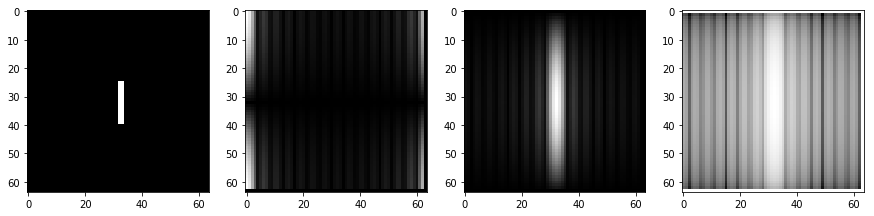

In [70]:
# image = cv2.imread('../images/dip/DIP3E_CH04_Original_Images/DIP3E_Original_Images_CH04/Fig0424(a)(rectangle).tif', 0).astype(np.float)
image = np.zeros((64,64), dtype=np.float32)
image[25:40,32:34] = 255


def discrete_fourier_transform(img, shift=False, phase_angle=False):
    
    M, N = img.shape
    F = np.zeros((M, N), dtype=np.complex)
    
    x, y = np.arange(0, N, 1), np.arange(0, M, 1)
    X,Y = np.meshgrid(x,y)
    
                   
    if shift:
        img = img * (-1)**(X+Y)
    
    for v in range(N-1):
        for u in range(M-1):           
            F[u, v] = np.sum(img * np.exp(- 1j * 2*np.pi * (u * X / M + v * Y / N)))
    
    if phase_angle:
        PA = np.arctan2(np.real(F), np.imag(F))
        return PA
    return F

F = discrete_fourier_transform(image)
F_shifted = discrete_fourier_transform(image, shift=True)
# F = np.fft.fft2(image)
# F_shifted = np.fft.fftshift(F)
fig, ax = plt.subplots(1,4, figsize=(15,15))

ax[0].imshow(image, cmap='gray')
ax[1].imshow(np.abs(F), cmap='gray')
ax[2].imshow(np.abs(F_shifted), cmap='gray')
ax[3].imshow(1+np.log(np.abs(F_shifted)), cmap='gray')

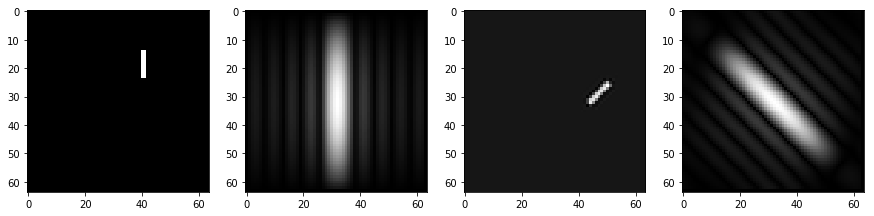

In [85]:
from scipy import ndimage
image = np.zeros((64,64), dtype=np.float32)
image[14:24,40:42] = 255


F_shifted = discrete_fourier_transform(image, shift=True)

img_rot = ndimage.rotate(image, -45, reshape=False).astype(np.float)

F_rot_shifted = discrete_fourier_transform(img_rot, shift=True)

fig, ax = plt.subplots(1,4, figsize=(15,15))

ax[0].imshow(image, cmap='gray')
ax[1].imshow(np.abs(F_shifted), cmap='gray')
ax[2].imshow(img_rot, cmap='gray')
ax[3].imshow(np.abs(F_rot_shifted), cmap='gray')

In [69]:
# image = cv2.imread('../images/dip/DIP3E_CH04_Original_Images/DIP3E_Original_Images_CH04/Fig0424(a)(rectangle).tif', 0).astype(np.float)
# F = np.fft.fft2(image)
# F_shifted = np.fft.fftshift(F)
# fig, ax = plt.subplots(1,4, figsize=(15,15))

# ax[0].imshow(image, cmap='gray')
# ax[1].imshow(np.abs(F), cmap='gray')
# ax[2].imshow(np.abs(F_shifted), cmap='gray')
# ax[3].imshow(1+np.log(np.abs(F_shifted)), cmap='gray')

相角图看起来有些奇怪应该是因为plt显示的原因，用OpenCV显示会比较正常。

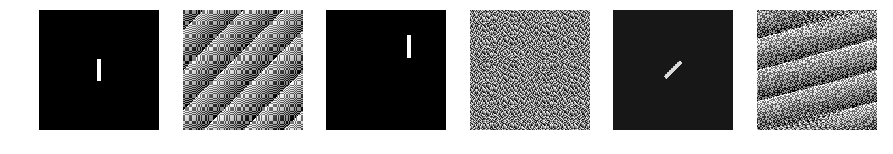

In [88]:
image = cv2.imread('../images/dip/DIP3E_CH04_Original_Images/DIP3E_Original_Images_CH04/Fig0424(a)(rectangle).tif', 0).astype(np.float)
F = np.fft.fft2(image)
F_shifted = np.fft.fftshift(F)
PA = np.arctan2(np.real(F_shifted), np.imag(F_shifted))

img_shifted = ndimage.interpolation.shift(image, (-200.,200.))
F_2 = np.fft.fft2(img_shifted)
F_2 = np.fft.fftshift(F_2)
PA_2 = np.arctan2(np.real(F_2), np.imag(F_2))

img_rot = ndimage.rotate(image, -45, reshape=False).astype(np.float)
F_3 = np.fft.fft2(img_rot)
F_3 = np.fft.fftshift(F_3)
PA_3 = np.arctan2(np.real(F_3), np.imag(F_3))

fig, ax = plt.subplots(1,6, figsize=(15,15))
for i in range(ax.shape[0]):
        ax[i].axis('off')
ax[0].imshow(image, cmap='gray')
ax[1].imshow(PA, cmap='gray')
ax[2].imshow(img_shifted , cmap='gray')
ax[3].imshow(PA_2, cmap='gray')
ax[4].imshow(img_rot , cmap='gray')
ax[5].imshow(PA_3, cmap='gray')